In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from utils import load_data_voc
from yolo import *
from torch import nn
import torchvision
from transforms import cutsomTransforms

ImportError: cannot import name 'plt' from 'matplotlib.pyplot' (c:\Users\Edward\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\pyplot.py)

In [ ]:
transform = cutsomTransforms.xylTransform(normalized=False)
train_iter, test_iter, test_iter_raw = load_data_voc(batch_size=16, trans = transform)
# train_iter, test_iter, test_iter_raw = load_data_voc(batch_size=16, download=True)

In [ ]:
resnet18 = torchvision.models.resnet18(weights=None)
backbone = nn.Sequential(*list(resnet18.children())[:-2]) # remove avg pool and fc
net = Yolo(backbone, backbone_out_channels=512)

x * 7.0 - xidx: 0.31899999999999995. Xmax: 0.676, Xmin: 0.558. x: 0.617, xidx: 4
y * 7.0 - yidx: 0.08000000000000007. Ymax: 0.5626666666666666, Ymin: 0.31733333333333336. y: 0.44, xidx: 3


NameError: name 'exit' is not defined

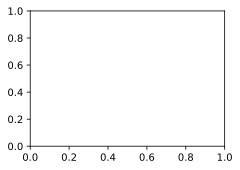

In [ ]:
def lr(epoch):
    if epoch < 10: return 0.001 * (epoch + 1)
    if epoch < 85: return 0.01
    if epoch < 115: return 0.001
    if epoch < 145: return 0.0001

train(net, train_iter, test_iter, 125, lr=lr, momentum=0.9, weight_decay=5e-4, accum_batch_num=4, save_path='./model', pretrained=False,
      save_every=2)
# train(net, train_iter, test_iter, 1, lr=lr, momentum=0.9, weight_decay=5e-4, accum_batch_num=4, save_path='./model', pretrained=False, save_every=20)